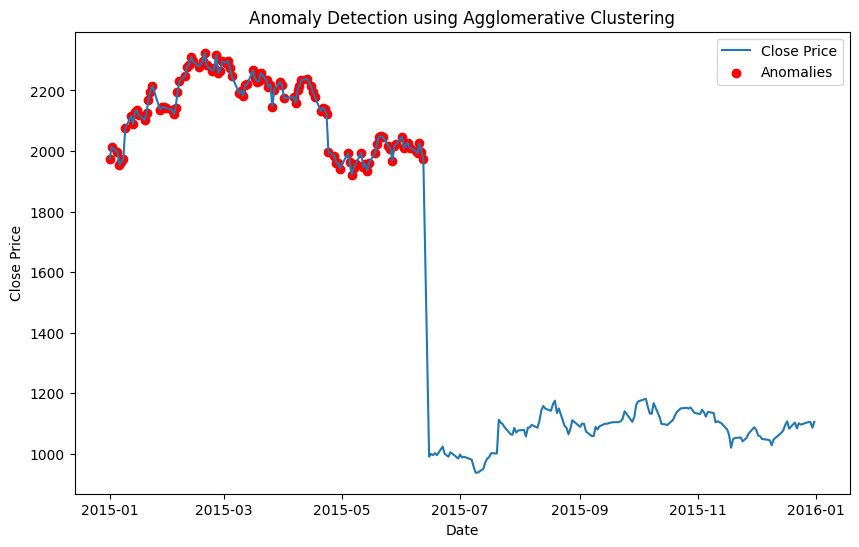

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('infy_stock.csv')

# Assuming the dataset has 'Date' and 'Close' columns
dates = pd.to_datetime(data['Date'])
close_prices = data['Close'].values.reshape(-1, 1)

# Feature engineering
# In this simple example, we'll use only 'Close' prices

# Train Agglomerative Clustering model
n_clusters = 2  # You may adjust the number of clusters as per your requirement
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agg_clustering.fit_predict(close_prices)

# Identify anomalies as data points in clusters with fewer samples
anomalies = cluster_labels == np.argmin(np.bincount(cluster_labels))

# Extract anomaly dates
anomaly_dates = dates[anomalies]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(dates, close_prices, label='Close Price')
plt.scatter(anomaly_dates, close_prices[anomalies], color='red', marker='o', label='Anomalies')
plt.title('Anomaly Detection using Agglomerative Clustering')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
